In [1]:
!pip install torch
!pip install pandas
!pip install numpy
!pip install pathlib
!pip install sklearn
!pip install mathplotlib

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.



Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement mathplotlib (from versions: none)
ERROR: No matching distribution found for mathplotlib
You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

In [3]:
if torch.cuda.is_available():
  print("\nUsing: ", torch.cuda.get_device_name(0))
  device = torch.device('cuda')
else:
  print("\nUsing: CPU")
  device = torch.device('cpu')


Using:  GeForce GTX 1070


In [4]:
def load_dataset (data_filename):
  data_path = Path(data_filename)
  if data_path.exists():
    print(f"Loading {data_path}...")
    data_csv = pd.read_csv(data_path)
    return data_csv
  else:
    print(f"The dataset in {data_path} does not exist")

In [5]:
data = load_dataset("stock_price_sentiment_data.csv")
data['sentiment'].fillna(-1, inplace=True)
data.head(10)

Loading stock_price_sentiment_data.csv...


,Date,Open,High,Low,Close,Adj Close,Volume,Stock,headline,publisher,sentiment
0,2012-05-14,27.804007,28.211731,27.496424,27.825464,25.591705,5526574.0,A,"Groupon, Agilent: After-Hours Headlines",webmaster,2.0
1,2012-05-15,29.263233,29.735336,28.905579,28.977110,26.650898,9783064.0,A,Agilent Sees Improving Trends - Analyst Blog,Zacks,0.0
2,2012-05-16,29.091558,29.327612,28.397711,28.440628,26.157486,4976321.0,A,"Agilent Still A Name Worth Owning (A, DHR, WAT...",Investopedia,2.0
3,2012-05-17,29.971388,29.978540,28.340487,28.347639,26.071957,6900248.0,A,"Stocks to Watch: Wal-Mart, Sears (Update 1)",TheStreet.Com,2.0
4,2012-05-18,28.612303,28.776825,27.625179,27.703863,25.479870,7216057.0,A,NaN,NaN,-1.0
5,2012-05-21,27.775393,28.698139,27.753935,28.605150,26.308800,3890215.0,A,NaN,NaN,-1.0
6,2012-05-22,28.655222,29.470673,28.340487,28.962805,26.637741,6180139.0,A,Agilent Pays A Hefty Price For A Fixer-Upper D...,Investopedia,0.0
7,2012-05-23,28.633762,29.341917,28.175966,29.163090,26.821951,4817788.0,A,NaN,NaN,-1.0
8,2012-05-24,29.213161,29.434908,28.934193,29.341917,26.986423,3591182.0,A,NaN,NaN,-1.0
9,2012-05-25,29.341917,29.656652,29.177397,29.334764,26.979847,2633552.0,A,NaN,NaN,-1.0


In [6]:
# get the stock list
stock_list = data['Stock'].unique()
print(f"The dataset consists of {len(stock_list)} stocks.\n{stock_list}")

The dataset consists of 4752 stocks.
['A' 'AA' 'AADR' ... 'ZTR' 'ZTS' 'ZUMZ']


In [7]:
# split data
train_test_data = {}
for index, stock in enumerate(stock_list):
    train_test_data[stock] = {}
    try:
      train_test_data[stock]["train"], train_test_data[stock]["test"] = train_test_split(data.loc[(data['Stock'] == stock), ['Date', 'Close', 'sentiment', 'Stock', 'Volume']], test_size = 0.33, shuffle=False)
    except ValueError:
      print(data.loc[(data['Stock'] == stock), 
                     ['Date', 'Close', 'sentiment', 'Stock', 'Volume']])
      del train_test_data[stock]
    print(f"{stock}: {index + 1} / {len(stock_list)}")

A: 1 / 4752
AA: 2 / 4752
AADR: 3 / 4752
AAL: 4 / 4752
AAMC: 5 / 4752
AAME: 6 / 4752
AAOI: 7 / 4752
AAON: 8 / 4752
AAP: 9 / 4752
AAPL: 10 / 4752
AAU: 11 / 4752
AAWW: 12 / 4752
AAXJ: 13 / 4752
AB: 14 / 4752
ABAX: 15 / 4752
ABB: 16 / 4752
ABBV: 17 / 4752
ABC: 18 / 4752
ABCB: 19 / 4752
ABCD: 20 / 4752
ABCO: 21 / 4752
ABEV: 22 / 4752
ABG: 23 / 4752
ABIO: 24 / 4752
ABM: 25 / 4752
ABMD: 26 / 4752
ABR: 27 / 4752
ACAD: 28 / 4752
ACC: 29 / 4752
ACCO: 30 / 4752
ACE: 31 / 4752
ACET: 32 / 4752
ACFC: 33 / 4752
ACFN: 34 / 4752
ACGL: 35 / 4752
ACH: 36 / 4752
ACHC: 37 / 4752
ACIM: 38 / 4752
ACIW: 39 / 4752
ACLS: 40 / 4752
ACM: 41 / 4752
ACN: 42 / 4752
ACNB: 43 / 4752
ACOR: 44 / 4752
ACP: 45 / 4752
ACRE: 46 / 4752
ACRX: 47 / 4752
ACST: 48 / 4752
ACT: 49 / 4752
ACTA: 50 / 4752
ACTG: 51 / 4752
ACU: 52 / 4752
ACUR: 53 / 4752
ACWI: 54 / 4752
ACWV: 55 / 4752
ACWX: 56 / 4752
ACY: 57 / 4752
ADBE: 58 / 4752
ADC: 59 / 4752
ADES: 60 / 4752
ADI: 61 / 4752
ADM: 62 / 4752
ADMA: 63 / 4752
ADMP: 64 / 4752
ADMS: 65 / 4

In [8]:

print(train_test_data['AT']["train"].tail(10))

              Date  Close  sentiment Stock     Volume
427674  2017-03-10   2.55       -1.0    AT   577100.0
427675  2017-03-13   2.55       -1.0    AT   457700.0
427676  2017-03-14   2.55       -1.0    AT   442900.0
427677  2017-03-15   2.60       -1.0    AT   494900.0
427678  2017-03-16   2.65        0.0    AT   458500.0
427679  2017-03-17   2.70       -1.0    AT  1024100.0
427680  2017-03-20   2.70       -1.0    AT   285400.0
427681  2017-03-21   2.60       -1.0    AT   421100.0
427682  2017-03-22   2.60       -1.0    AT   314800.0
427683  2017-03-23   2.60       -1.0    AT   223800.0


In [21]:
# calculate return, drop stocks with too little data and drop rows with nan values
for index, stock in enumerate(stock_list):
  try:
    print(f"{stock} : {index} / {len(stock_list)}")
    if len(train_test_data[stock]["train"]) < 10:
      del train_test_data[stock]
    else:
      train_test_data[stock]["train"]['PrevClose'] = train_test_data[stock]["train"]['Close'].shift(1)
      train_test_data[stock]["test"]['PrevClose'] = train_test_data[stock]["train"]['Close'].shift(1)
      train_test_data[stock]["train"]['Return'] = (train_test_data[stock]["train"]['Close'] 
                                                   - train_test_data[stock]["train"]['PrevClose'])
                                                  / train_test_data[stock]["train"]['PrevClose']
      train_test_data[stock]["test"]['Return'] = (train_test_data[stock]["test"]['Close'] 
                                                  - train_test_data[stock]["test"]['PrevClose']) 
                                                  / train_test_data[stock]["test"]['PrevClose']
      train_test_data[stock]["train"].dropna(how='any', inplace=True)
      train_test_data[stock]["test"].dropna(how='any', inplace=True)
  except KeyError:
    print(f"Some Error at stock {stock}")

A : 0 / 4638
AA : 1 / 4638
AADR : 2 / 4638
AAL : 3 / 4638
AAMC : 4 / 4638
AAME : 5 / 4638
AAOI : 6 / 4638
AAON : 7 / 4638
AAP : 8 / 4638
AAU : 9 / 4638
AAWW : 10 / 4638
AAXJ : 11 / 4638
AB : 12 / 4638
ABAX : 13 / 4638
ABB : 14 / 4638
ABBV : 15 / 4638
ABC : 16 / 4638
ABCB : 17 / 4638
ABCD : 18 / 4638
ABCO : 19 / 4638
ABEV : 20 / 4638
ABG : 21 / 4638
ABIO : 22 / 4638
ABM : 23 / 4638
ABMD : 24 / 4638
ABR : 25 / 4638
ACAD : 26 / 4638
ACC : 27 / 4638
ACCO : 28 / 4638
ACE : 29 / 4638
ACET : 30 / 4638
ACFC : 31 / 4638
ACFN : 32 / 4638
ACGL : 33 / 4638
ACH : 34 / 4638
ACHC : 35 / 4638
ACIM : 36 / 4638
ACIW : 37 / 4638
ACLS : 38 / 4638
ACM : 39 / 4638
ACN : 40 / 4638
ACNB : 41 / 4638
ACOR : 42 / 4638
ACP : 43 / 4638
ACRE : 44 / 4638
ACRX : 45 / 4638
ACST : 46 / 4638
ACT : 47 / 4638
ACTA : 48 / 4638
ACTG : 49 / 4638
ACU : 50 / 4638
ACUR : 51 / 4638
ACWI : 52 / 4638
ACWV : 53 / 4638
ACWX : 54 / 4638
ACY : 55 / 4638
ADBE : 56 / 4638
ADC : 57 / 4638
ADES : 58 / 4638
ADI : 59 / 4638
ADM : 60 / 4638


In [22]:
#check if this stock contains nan
train_test_data['AT']['train'].isnull().values.any()

False

In [23]:
# get the stock list
stock_list = list(train_test_data.keys())
print(f"The dataset consists of {len(stock_list)} stocks.\n{stock_list}")

The dataset consists of 4629 stocks.
['A', 'AA', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAOI', 'AAON', 'AAP', 'AAU', 'AAWW', 'AAXJ', 'AB', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABEV', 'ABG', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ACAD', 'ACC', 'ACCO', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACGL', 'ACH', 'ACHC', 'ACIM', 'ACIW', 'ACLS', 'ACM', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACRE', 'ACRX', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACY', 'ADBE', 'ADC', 'ADES', 'ADI', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AED', 'AEE', 'AEG', 'AEGN', 'AEH', 'AEHR', 'AEIS', 'AEL', 'AEO', 'AER', 'AERI', 'AES', 'AET', 'AEY', 'AEZS', 'AFAM', 'AFB', 'AFC', 'AFCB', 'AFG', 'AFK', 'AFL', 'AFMD', 'AFSI', 'AFT', 'AG', 'AGA', 'AGCO', 'AGD', 'AGEN', 'AGF', 'AGG', 'AGIO', 'AGM', 'AGNC', 'AGND', 'AGO', 'AGOL', 'AGQ', 'AGRO', 'AGRX', 'AGTC', 'AGX', 'AGYS', 'AGZ', 'AGZD', 'AHC', 'AHGP', 'AHH', 'A

              Date  Close  sentiment Stock     Volume  PrevClose    Return
427674  2017-03-10   2.55       -1.0    AT   577100.0       2.50  0.020000
427675  2017-03-13   2.55       -1.0    AT   457700.0       2.55  0.000000
427676  2017-03-14   2.55       -1.0    AT   442900.0       2.55  0.000000
427677  2017-03-15   2.60       -1.0    AT   494900.0       2.55  0.019608
427678  2017-03-16   2.65        0.0    AT   458500.0       2.60  0.019231
427679  2017-03-17   2.70       -1.0    AT  1024100.0       2.65  0.018868
427680  2017-03-20   2.70       -1.0    AT   285400.0       2.70  0.000000
427681  2017-03-21   2.60       -1.0    AT   421100.0       2.70 -0.037037
427682  2017-03-22   2.60       -1.0    AT   314800.0       2.60  0.000000
427683  2017-03-23   2.60       -1.0    AT   223800.0       2.60  0.000000


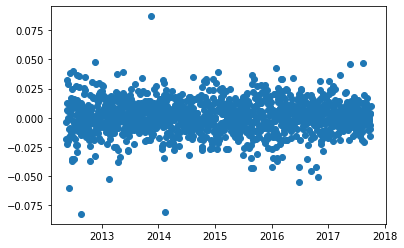

In [24]:
# plot histogram
print(train_test_data['AT']["train"].tail(10))
dates = matplotlib.dates.date2num(train_test_data['A']['train']['Date'])
plt.plot_date(dates, train_test_data['A']["train"]['Return'])


In [25]:
# reformat dataset for using series of length T to predict the return
seq_len = 10
train_data = {}
test_data = {}
for index, stock in enumerate(stock_list):
  train_data[stock] = {}
  X_train = []
  Y_train = []
  X_test = []
  Y_test = []
  for time in range(len(train_test_data[stock]["train"]) - seq_len):
    if train_test_data[stock]["train"]['Return'].iloc[time + seq_len] != 0:
      x_train = train_test_data[stock]["train"].iloc[time:time + seq_len].drop(['Date', 'Stock', 'PrevClose', 'Close'], axis=1)
      X_train.append(x_train)
      y_train = train_test_data[stock]["train"]['Return'].iloc[time + seq_len]
      Y_train.append(y_train)

  X_train = np.array(list(map(lambda x: x.to_numpy(), X_train)))
  X_train = X_train.reshape((-1, seq_len, 3))
  Y_train = np.array(Y_train)
  
  train_data[stock]['input'] = X_train
  train_data[stock]['label'] = Y_train

  print(f"{stock}: {index + 1} / {len(stock_list)}")

A: 1 / 4629
AA: 2 / 4629
AADR: 3 / 4629
AAL: 4 / 4629
AAMC: 5 / 4629
AAME: 6 / 4629
AAOI: 7 / 4629
AAON: 8 / 4629
AAP: 9 / 4629
AAU: 10 / 4629
AAWW: 11 / 4629
AAXJ: 12 / 4629
AB: 13 / 4629
ABAX: 14 / 4629
ABB: 15 / 4629
ABBV: 16 / 4629
ABC: 17 / 4629
ABCB: 18 / 4629
ABCD: 19 / 4629
ABCO: 20 / 4629
ABEV: 21 / 4629
ABG: 22 / 4629
ABIO: 23 / 4629
ABM: 24 / 4629
ABMD: 25 / 4629
ABR: 26 / 4629
ACAD: 27 / 4629
ACC: 28 / 4629
ACCO: 29 / 4629
ACE: 30 / 4629
ACET: 31 / 4629
ACFC: 32 / 4629
ACFN: 33 / 4629
ACGL: 34 / 4629
ACH: 35 / 4629
ACHC: 36 / 4629
ACIM: 37 / 4629
ACIW: 38 / 4629
ACLS: 39 / 4629
ACM: 40 / 4629
ACN: 41 / 4629
ACNB: 42 / 4629
ACOR: 43 / 4629
ACP: 44 / 4629
ACRE: 45 / 4629
ACRX: 46 / 4629
ACST: 47 / 4629
ACT: 48 / 4629
ACTA: 49 / 4629
ACTG: 50 / 4629
ACU: 51 / 4629
ACUR: 52 / 4629
ACWI: 53 / 4629
ACWV: 54 / 4629
ACWX: 55 / 4629
ACY: 56 / 4629
ADBE: 57 / 4629
ADC: 58 / 4629
ADES: 59 / 4629
ADI: 60 / 4629
ADM: 61 / 4629
ADMA: 62 / 4629
ADMP: 63 / 4629
ADMS: 64 / 4629
ADP: 65 / 46

In [26]:
for index, label in enumerate(train_data['AT']['label']):
  print(index, label)

0 -0.0022522322566456395
1 0.011286653044456365
2 -0.002976187730795046
3 -0.0052238579714151065
4 0.0015004094432216077
5 0.0022471709448661963
6 -0.0007474012553290473
7 0.004487690361276952
8 -0.0029784036443847458
9 0.01568334822722334
10 0.008088209822929331
11 -0.005105739943796386
12 0.004398787714968867
13 -0.0058394105707906645
14 0.002936854786279273
15 -0.01683744837522113
16 -0.0014892373275644777
17 0.008202879314185127
18 0.011834307839851434
19 -0.0007310108668674963
20 -0.003657658409349385
21 0.009544795560442961
22 -0.004363666881214489
23 0.018991982238947193
24 -0.005734761634399419
25 0.005046841773740732
26 0.01649931871119327
27 0.00493999255097581
28 0.00912922166646285
29 -0.008350722791562033
30 0.004210555762575383
31 0.0055904906610896735
32 -0.004169591256788425
33 -0.0027913441776685277
34 0.003498963671682166
35 0.0034867636124705126
36 0.03474635080408527
37 -0.006715942186970622
38 -0.002028379516468421
39 -0.0013550445429218695
40 0.006784286500849831


In [34]:
input_dim = 3
hidden_dim = 32
num_layers = 10
output_dim = 1
num_epochs = 10

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, dtype=torch.float32).requires_grad_().cuda()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, dtype=torch.float32).requires_grad_().cuda()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out
    def init_hidden(self, batch_size)->None:
      # This is what we'll initialise our hidden state
      self.hidden = (torch.zeros(self.num_layers, batch_size, self.hidden_dim).to('cuda'), torch.zeros(self.num_layers, batch_size, self.hidden_dim).to('cuda'))

In [35]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
model = model.to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [36]:

# fix training (some stocks seem to have bad labels (0. at stock AT in labels))
# add normalization
# add data loader
# add testing
# add experimenting
# add logging
# let the beast run
hist = np.zeros(num_epochs)
for stock in stock_list:
  for epoch in range(num_epochs):
    input = torch.from_numpy(train_data[stock]['input']).type(torch.cuda.FloatTensor)
    labels = torch.from_numpy(train_data[stock]['label']).type(torch.cuda.FloatTensor)
    
    if len(labels) > 0:
      model.train()
      model.zero_grad()
      model.init_hidden(10)
      out = model(input)
      #print(f"Input: {input}\nOutput:{out}\nLabels:{labels}")
      loss = criterion(out, labels)

      print("\n###################################################")
      print("Epoch: {}/{} Loss: {} Stock: {}".format(epoch+1, num_epochs, loss.item(), stock))
      print("###################################################\n")
      
      optimizer.zero_grad()
      #backpropagation
      loss.backward()
      #maximum gradient clipping
      torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
      #update parameters
      optimizer.step()

Streaming output truncated to the last 5000 lines.

###################################################
Epoch: 1/10 Loss: 4.659066689782776e-05 Stock: WPS
###################################################


###################################################
Epoch: 2/10 Loss: 4.523022289504297e-05 Stock: WPS
###################################################


###################################################
Epoch: 3/10 Loss: 4.4691656512441114e-05 Stock: WPS
###################################################


###################################################
Epoch: 4/10 Loss: 4.5012584450887516e-05 Stock: WPS
###################################################


###################################################
Epoch: 5/10 Loss: 4.5789594878442585e-05 Stock: WPS
###################################################


###################################################
Epoch: 6/10 Loss: 4.646808883990161e-05 Stock: WPS
###################################################


###